# Random Forest: A Powerful Ensemble Method

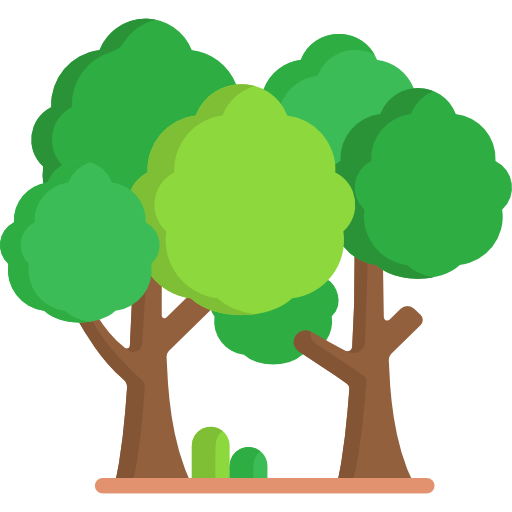

A random forest is a type of ensemble learning method for classification and regression that consists of multiple decision trees. Each tree in the forest is generated using a random subset of the data, and the final prediction is made by averaging the predictions of all the trees. This method helps to reduce overfitting, which is a common problem with decision trees, and improves the overall performance of the model. Additionally, random forests can also be used to estimate feature importance, which can be useful for feature selection.

This code is an example of how to use the scikit-learn library to train a random forest classifier with grid search for hyperparameter tuning, and visualize the ROC curve.

At first, we import the necessary libraries.

In [1]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

Then, we generate sample data for classification using the `make_classification` function from scikit-learn.

In [2]:
# Generate some sample data for classification
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2)

Next, we define the parameters for grid search, including the number of trees in the forest (`n_estimators`), the maximum depth of each tree (`max_depth`), and the minimum number of samples required to split an internal node (`min_samples_split`).

In [3]:
# Define the parameters to be searched in the grid search
param_grid = {'n_estimators': [10, 50, 75],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}

After that, we initialize a random forest classifier object and use the `GridSearchCV` class from scikit-learn to perform the grid search.

In [4]:
# Initialize the random forest classifier
clf = RandomForestClassifier()

# Perform the grid search
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, y)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best score:  0.9199999999999999


We then get the best estimator using the best_estimator_ attribute of the grid_search object.

In [5]:
# Get the best estimator 
best_clf = grid_search.best_estimator_

Next, we use the `predict_proba` method of the best estimator to get the predicted probability of positive class.

In [6]:
# Get the predicted probability of positive class
y_score = best_clf.predict_proba(X)[:, 1]

Finally, we use the `roc_curve` function from the `sklearn.metrics` library to compute the false positive rate (FPR) and true positive rate (TPR) for the predicted scores. The area under the ROC curve (AUC) is also computed using the auc function.

In [7]:
# Compute the ROC curve
fpr, tpr, _ = roc_curve(y, y_score)
roc_auc = auc(fpr, tpr)

After that, we use the `matplotlib.pyplot` library to plot the ROC curve by plotting the FPR and TPR against each other. The ROC curve is a useful tool for evaluating the performance of binary classifiers, as it allows to visualize the trade-off between the true positive rate and the false positive rate. A classifier with a higher AUC (area under the ROC curve) is generally considered to be a better classifier.

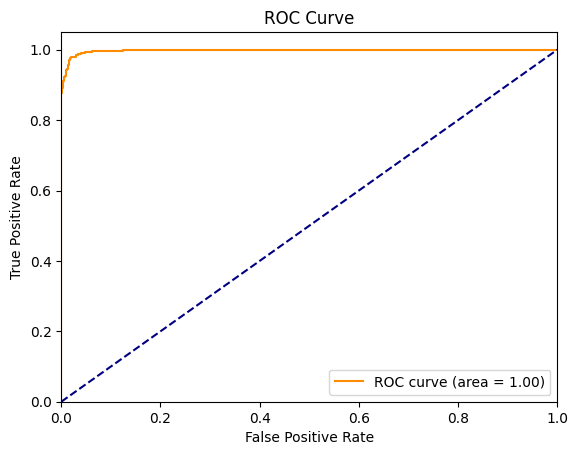

In [8]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### Conclusion

In conclusion, this code sample demonstrates how to use the scikit-learn library to train a random forest classifier with grid search for hyperparameter tuning, and how to visualize the ROC curve. The `RandomForestClassifier` class from the `sklearn.ensemble` library is used to train the random forest classifier, and the `GridSearchCV` class from the `sklearn.model_selection` library is used to perform the grid search. The sample data is generated using the `make_classification` function from the `sklearn.datasets` library.